In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shakespeare_functions as sf
import shakespeare_dicts as sd

from importlib import reload

import re
import nltk
from nltk import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk import RegexpTokenizer

from autocorrect import spell

import spacy
import en_core_web_sm

import gc

- Data import in RAM friendly way.

In [2]:
line_head = pd.read_csv('../data/csv/ShakespeareCharacterLines_engineered.csv', index_col = ['play', 'name', 'line_number'], \
                     usecols = list(range(0,16)))

In [3]:
line_df = pd.read_csv('../data/csv/ShakespeareCharacterLines_engineered.csv', \
                   usecols = list(range(16,22150)), dtype='uint16')

In [5]:
line_df.index = line_df.index.map(lambda x: line_head.index[x])

In [6]:
line_df = pd.concat([line_head, line_df], axis = 1)

In [7]:
char_df = pd.read_csv('../data/csv/ShakespeareCharacterLines_character_corpus.csv', index_col = ['play', 'name'])

In [8]:
type_df = pd.read_csv('../data/csv/ShakespeareCharacterLines_play_corpus.csv', index_col = ['play'])

In [9]:
colon = slice(None)

- Number of character deaths.

In [10]:
char_df['character_dies'].value_counts()

0.0    1262
1.0     131
Name: character_dies, dtype: int64

- Check distribution of character maximum lines.

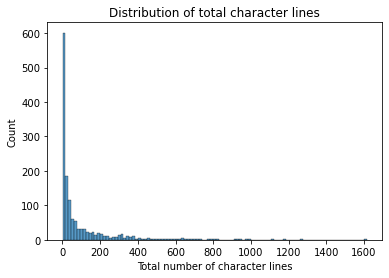

In [12]:
line_counts = {}
for index in line_head.index:
    play  = index[0]
    name = index[1]
    
    if (play, name) not in line_counts:
        line_counts[(play, name)] = line_head.loc[(play, name, colon), 'max_line_count'][0]

sns.histplot(line_counts)
plt.xlabel('Total number of character lines')
plt.title("Distribution of total character lines")
plt.show()

- Distribution of total character counts.

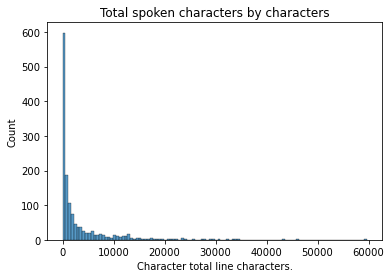

In [13]:
character_counts = {}
for index in line_head.index:
    play  = index[0]
    name = index[1]
    
    if (play, name) not in character_counts:
        character_counts[(play, name)] = line_head.loc[(play, name, colon), 'total_character_count'][0]

sns.histplot(character_counts)
plt.xlabel("Character total line characters.")
plt.title("Total spoken characters by characters")
plt.show()

- Characters with the most speaking lines.

In [34]:
def characters_with_most(group, num = 7):
    temp = []
    [temp.append(name) for name in line_head.sort_values(by = group).index.get_level_values(1) if name not in temp]
    temp.reverse()
    return temp[:num]

In [30]:
characters_with_most('max_line_count')

['HAMLET', 'IAGO', 'CORIOLANUS', 'OTHELLO', 'TIMON', 'LEAR', 'MACBETH']

- Characters with the longest dialogue overall.

In [31]:
characters_with_most('total_character_count')

['HAMLET', 'IAGO', 'TIMON', 'CORIOLANUS', 'OTHELLO', 'LEAR', 'MACBETH']

- Characters that dominate the dialogue of their respective plays.

In [32]:
characters_with_most('percent_line_count')

['HAMLET', 'TIMON', 'MACBETH', 'IAGO', 'PROSPERO', 'ROSALIND', 'OTHELLO']

- Most negative characters.

In [35]:
characters_with_most('neg_sentiment', 5)

['FIRST PIRATE',
 'ALL CONSPIRATORS',
 'GHOST OF VAUGHAN',
 'ALL THE SERVITORS',
 'MARINERS']

- Most positive characters.

In [36]:
characters_with_most('pos_sentiment', 5)

['BAVIAN', 'OUTLAWS', 'SECOND PIRATE', 'OFFICERS', 'AEDILES']

- Characters with highest compound sentiment.

In [37]:
characters_with_most('compound_sentiment', 5)

['OUTLAWS', 'AEDILES', 'SENATORS', 'OFFICERS', 'SECOND PIRATE']

- Additional statistics.

In [38]:
line_stats = line_df.describe()

- Maximum times a word used by a character.

<AxesSubplot:>

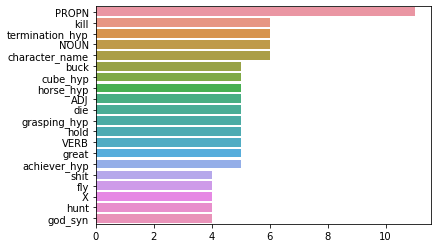

In [71]:
maxima_keys = list(line_stats.loc['max'].sort_values(ascending = False).to_dict().keys())
maxima_values = list(line_stats.loc['max'].sort_values(ascending = False).to_dict().values())
sns.barplot(y = maxima_keys[5:25], x = maxima_values[5:25])

- Most frequently used words.

<AxesSubplot:>

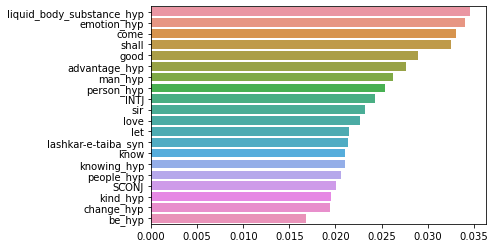

In [69]:
mean_keys = list(line_stats.loc['mean'].sort_values(ascending = False).to_dict().keys())
mean_values = list(line_stats.loc['mean'].sort_values(ascending = False).to_dict().values())
sns.barplot(y = mean_keys[18:38], x = mean_values[18:38])

- Most variant words.

<AxesSubplot:>

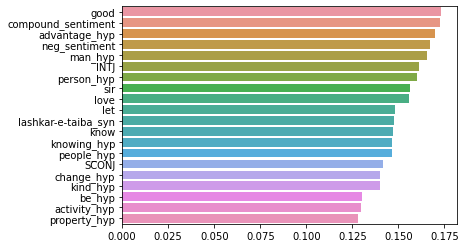

In [70]:
std_keys = list(line_stats.loc['std'].sort_values(ascending = False).to_dict().keys())
std_values = list(line_stats.loc['std'].sort_values(ascending = False).to_dict().values())
sns.barplot(y = std_keys[18:38], x = std_values[18:38])

- On to step 5 ->